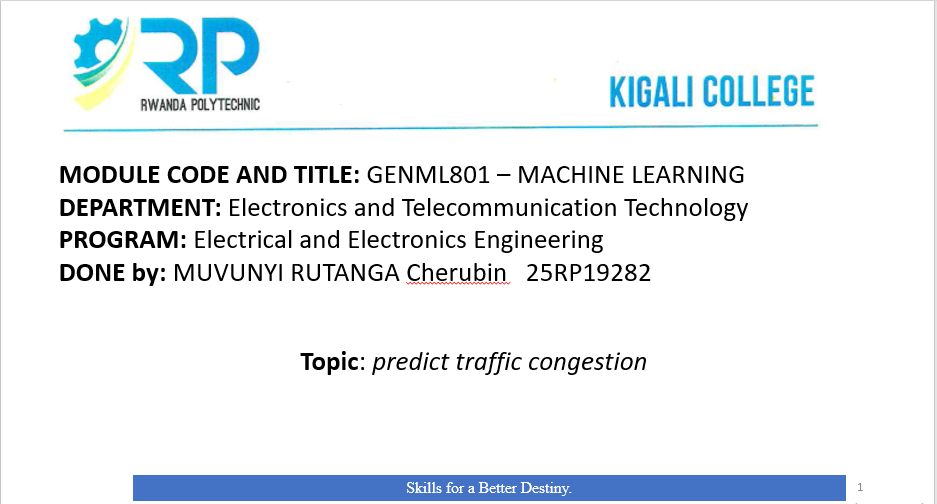

1. problem statement

        Traffic congestion is the slowdown and breakdown of traffic flow caused by too many vehicles on limited road capacity, leading to increased travel times, higher fuel consumption, increased air pollution, economic losses, higher accident rates, and significant negative impacts on public health and overall quality of life.
        And this PGM is how can we predict it before it happens.

2. Dataset

   Dataset came from Kaggle ( traffic congestion )

   The dataset is composed of the location,date, time the congestion occur , but it also shows you the level of congestion. 

import pandas
dataframe = pandas.read_csv('C:/Users/USER/Desktop/ML/csv/archive.zip')
dataframe

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   location          3600 non-null   object
 1   date              3600 non-null   object
 2   time              3600 non-null   object
 3   congestion_level  3600 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 112.6+ KB


3. Apply Exploratory Data Analysis (EDA)

In this section, we visualize the dataset to understand traffic congestion patterns.
We will apply **univariate, bivariate, and multivariate analysis** using different chart types:

- Histograms → show distributions of numeric variables.  
- Bar charts → compare categorical variables.  
- Box plots → identify spread and outliers.  
- Scatter plots → show relationships between two numeric variables. 


In [15]:
# Import libraries we going to use #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/USER/Desktop/ML/csv/archive.zip")

# Convert date and time
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format="%H:%M").dt.hour

df.head()

,location,date,time,congestion_level,hour
0,Istanbul - Kadikoy,2025-03-05,00:00,1,0
1,Istanbul - Kadikoy,2025-03-05,01:00,3,1
2,Istanbul - Kadikoy,2025-03-05,02:00,3,2
3,Istanbul - Kadikoy,2025-03-05,03:00,5,3
4,Istanbul - Kadikoy,2025-03-05,04:00,1,4


 1. Univariate Analysis
We analyze individual variables like:
- Distribution of `congestion_level`
- Frequency of `location`
- Distribution of traffic by hour of day

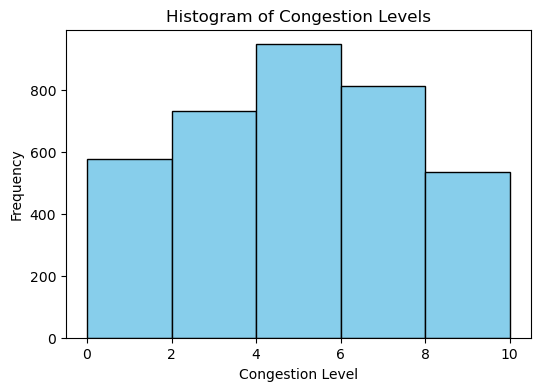

In [16]:
# Histogram of congestion levels
plt.figure(figsize=(6,4))
plt.hist(df['congestion_level'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Congestion Levels")
plt.xlabel("Congestion Level")
plt.ylabel("Frequency")
plt.show()

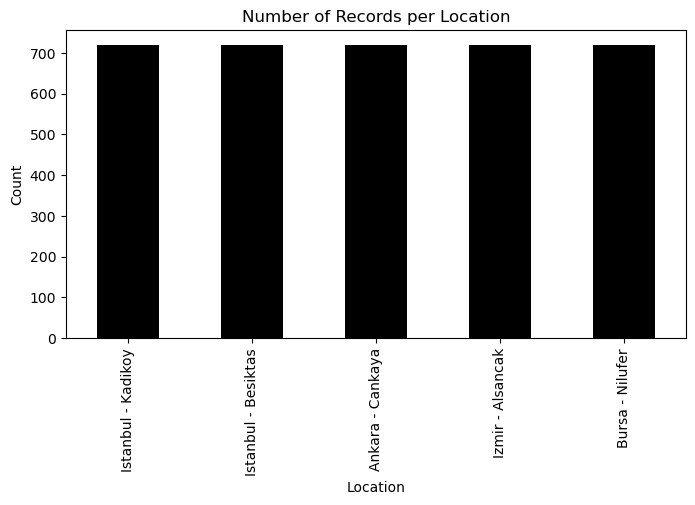

In [18]:
# Bar chart for locations
plt.figure(figsize=(8,4))
df['location'].value_counts().plot(kind='bar', color='black')
plt.title("Number of Records per Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

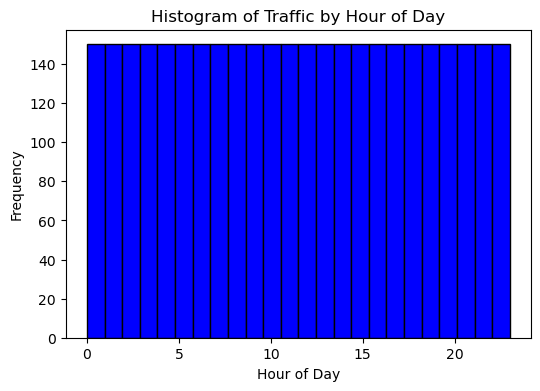

In [20]:
# Histogram of traffic by hour
plt.figure(figsize=(6,4))
plt.hist(df['hour'], bins=24, color='blue', edgecolor='black')
plt.title("Histogram of Traffic by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()

 3. Multivariate Analysis
We combine 3+ variables to discover patterns.
- Heatmap of congestion by location and hour
- Scatter plot to explore relationships


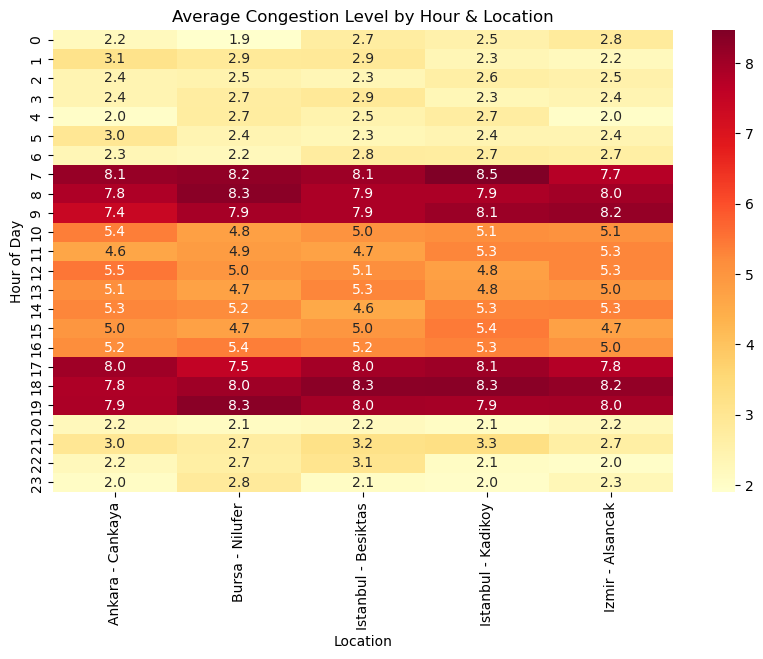

In [21]:
# Heatmap: location vs hour vs congestion
pivot_table = df.pivot_table(values="congestion_level", index="hour", columns="location", aggfunc="mean")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Average Congestion Level by Hour & Location")
plt.ylabel("Hour of Day")
plt.xlabel("Location")
plt.show()

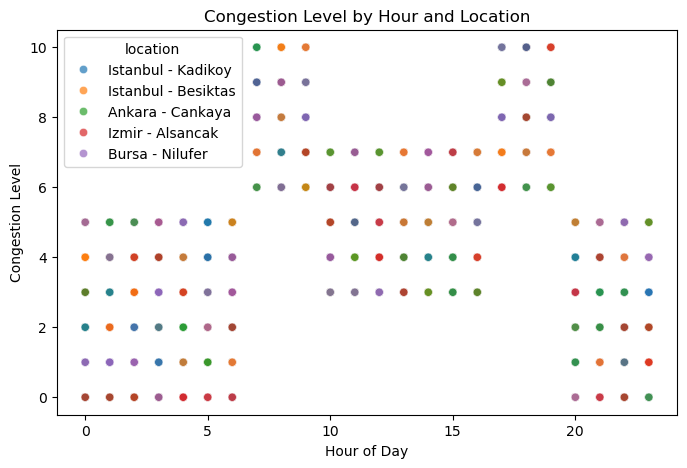

In [22]:
# Scatter plot: hour vs congestion (colored by location)
plt.figure(figsize=(8,5))
sns.scatterplot(x="hour", y="congestion_level", hue="location", data=df, alpha=0.7)
plt.title("Congestion Level by Hour and Location")
plt.xlabel("Hour of Day")
plt.ylabel("Congestion Level")
plt.show()

Apply correlation matrix and pair plots to analyze relationships( here we are trying to find the hidden relationship in our dataset)

To analyze relationships among variables, we apply:

*Correlation Matrix*: shows the strength of linear relationships between numeric variables.

*Pair Plot (scatterplot matrix)*: visualizes pairwise relationships across multiple variables.

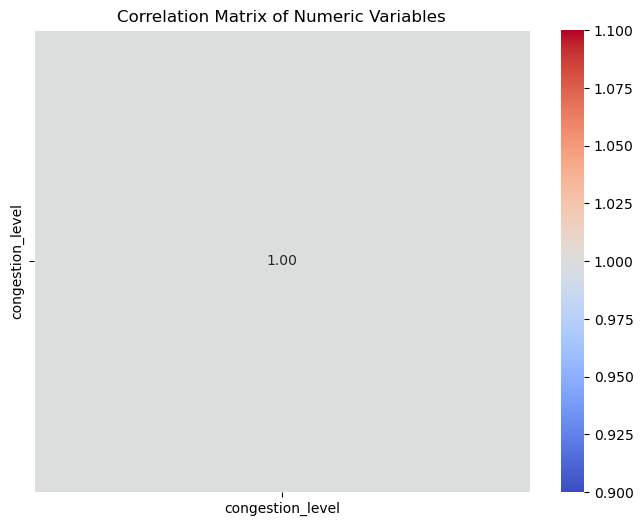

In [23]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

#comment:
- Values closer to +1 indicate strong positive correlation.
- Values closer to -1 indicate strong negative correlation.
- Values near 0 indicate weak or no correlation.

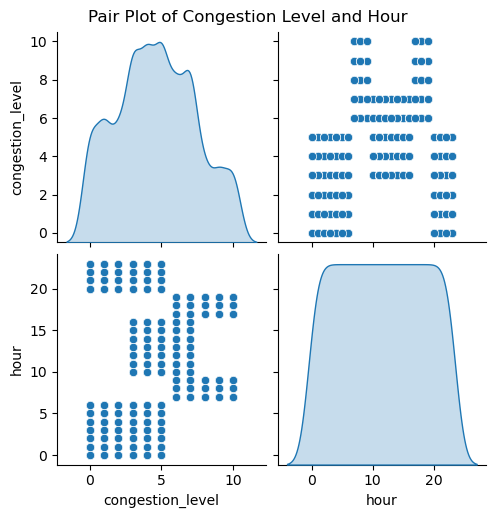

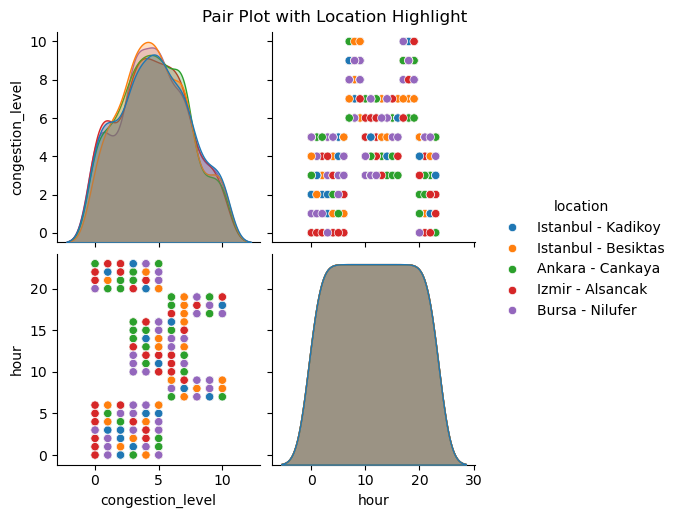

In [24]:
# Pairplot across selected features
sns.pairplot(df[['congestion_level','hour']], diag_kind="kde", kind="scatter", hue=None)
plt.suptitle("Pair Plot of Congestion Level and Hour", y=1.02)
plt.show()

# If you want to include location (categorical), color by location
sns.pairplot(df[['congestion_level','hour','location']], diag_kind="kde", kind="scatter", hue="location")
plt.suptitle("Pair Plot with Location Highlight", y=1.02)
plt.show()

# comment:
- Pair plots allow us to see how congestion levels vary with hours and across locations.

- The diagonal shows distributions, while off-diagonal plots show relationships.

Correlation matrix (heatmap) to check numeric relationships.

Pair plots for both numeric-only and categorical-colored relationships.

# Data Quality Checks: Missing Values, Outliers, and Anomalies #

Before modeling, we must check:
1. *Missing values* — to see if we need imputation or removal.  
2. *Outliers* — extreme values that may distort patterns.  
3. *Anomalies* — unusual data points that don’t fit expected patterns. 

Missing Values per Column:

location            0
date                0
time                0
congestion_level    0
hour                0
dtype: int64


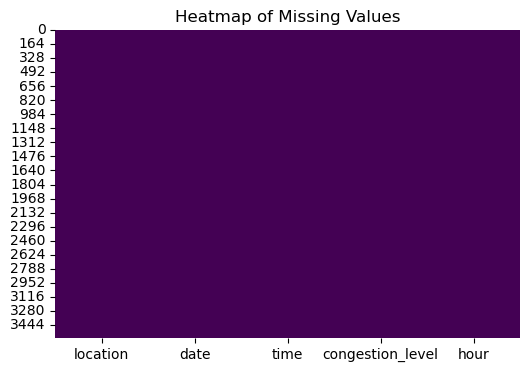

In [27]:
# Missing values check
print("Missing Values per Column:\n")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

*Explanation*:  

- Columns with many missing values may require removal or imputation.  
- A heatmap gives a quick overview of missing data patterns.  

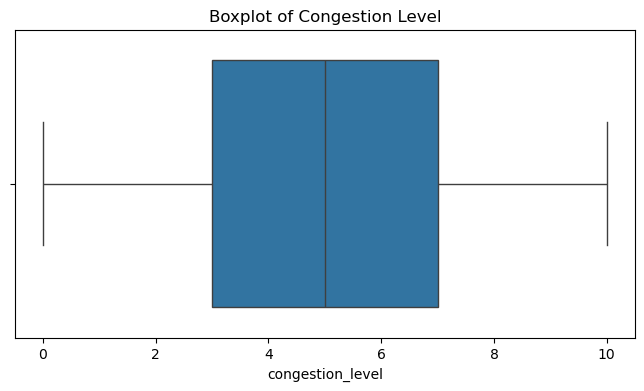

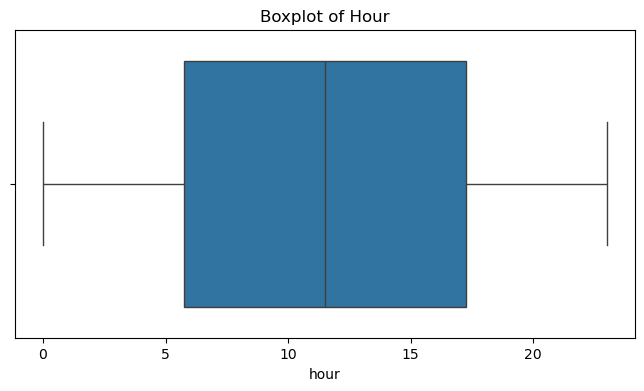

In [29]:
# Boxplot to detect outliers in congestion_level and hour
plt.figure(figsize=(8,4))
sns.boxplot(x=df['congestion_level'])
plt.title("Boxplot of Congestion Level")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['hour'])
plt.title("Boxplot of Hour")
plt.show()

In [30]:
# Using IQR (Interquartile Range) method to detect outliers in congestion_level
Q1 = df['congestion_level'].quantile(0.25)
Q3 = df['congestion_level'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['congestion_level'] < (Q1 - 1.5 * IQR)) | (df['congestion_level'] > (Q3 + 1.5 * IQR))]
print(f"Number of Outliers in Congestion Level: {len(outliers)}")
outliers.head()

Number of Outliers in Congestion Level: 0


,location,date,time,congestion_level,hour


*Explanation*:  
- *Boxplots* show extreme values visually.  
- Using the *IQR rule*, we detect data points that fall far outside normal ranges. 

In [31]:
# Detect Anomalies
# Example: check if congestion_level is outside expected 1–5 range
invalid_congestion = df[~df['congestion_level'].between(1,5)]
print(f"Invalid congestion values found: {len(invalid_congestion)}")

# Example: check if hour is within 0–23
invalid_hours = df[~df['hour'].between(0,23)]
print(f"Invalid hour values found: {len(invalid_hours)}")

Invalid congestion values found: 1626
Invalid hour values found: 0


*Explanation*:  
- Congestion should logically be between **1 and 5**.  
- Hour should be between **0 and 23**.  
- Any values outside these ranges are considered **anomalies** and should be corrected or removed.  

so here as we summarize

Detect missing values (heatmap + counts).

Spot outliers (boxplots + IQR method).

Identify data anomalies (values outside valid ranges).

4. Apply Feature Engineering Techniques

Handle missing values (e.g., imputation, removal).

#Handling Missing Values#

Missing data can bias models and reduce accuracy.  
We can handle them by:  
- *Removal* → drop rows/columns with too many missing values.
- *Imputation* → fill missing values with mean, median, mode, or forward/backward fill.

In [32]:

# Check missing values before handling
df.isnull().sum()

location            0
date                0
time                0
congestion_level    0
hour                0
dtype: int64

In [33]:
# Drop columns with more than 30% missing values
threshold = 0.3
df = df.dropna(axis=1, thresh=int((1-threshold)*len(df)))

# Drop rows where critical fields are missing (e.g., location, congestion_level)
df = df.dropna(subset=['location','congestion_level'])

In [34]:
#Imputation for Remaining Missing Values
# Numerical columns: fill with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns: fill with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6076\1270205576.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6076\1270205576.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [35]:
# Verify Missing Values
# Check again to confirm
print("Remaining Missing Values After Treatment:\n")
print(df.isnull().sum())

Remaining Missing Values After Treatment:

location            0
date                0
time                0
congestion_level    0
hour                0
dtype: int64


 Explanation:
1. *Dropping* → removes data that cannot be reliably imputed.  
2. *Median imputation* → robust for skewed numerical distributions.  
3. *Mode imputation* → best for categorical variables.  

#Handling Outliers and Anomalies

Outliers and anomalies can distort analysis and reduce model accuracy.  
We will handle them using:
- *IQR-based capping* → limits extreme values to acceptable range.  
- *Log/Box-Cox transformation* → reduces skewness in numeric features.  
- *Rule-based anomaly removal* → remove logically invalid values (e.g., hour > 23). 

In [37]:
# IQR-based Outlier Detection and Capping
# Define a function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Apply to numeric columns (except IDs/dates)
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if col not in ['ID']:  # exclude identifier columns if present
        df[col] = cap_outliers(df[col])

In [38]:
#Transformation to Reduce Skewness
import numpy as np

# Example: log-transform skewed columns
for col in num_cols:
    if (df[col] > 0).all():  # log works only for positive values
        df[col+"_log"] = np.log1p(df[col])  # log(1+x) to handle zeros

In [39]:
#Handling Data Anomalies (Rule-based)
# Remove anomalies outside valid ranges
df = df[df['congestion_level'].between(1,5)]   # congestion must be 1–5
df = df[df['hour'].between(0,23)]              # hour must be 0–23

In [40]:
#Re-check Data After Cleaning
# Check summary stats again
df.describe()

,date,congestion_level,hour
count,1974,1974.000000,1974.000000
mean,2025-03-19 10:08:23.343464960,3.290274,10.732016
min,2025-03-05 00:00:00,1.000000,0.000000
25%,2025-03-12 00:00:00,2.000000,4.000000
50%,2025-03-19 00:00:00,3.000000,11.000000
75%,2025-03-27 00:00:00,4.000000,20.000000
max,2025-04-03 00:00:00,5.000000,23.000000
std,NaN,1.365841,7.762479


#Explanation:
1. *IQR-based capping* keeps values within a safe range instead of dropping them.  
2. *Transformations* (log, Box-Cox) reduce skewness, improving model stability.  
3. *Rule-based cleaning* ensures values are logically valid.  
4. Final `describe()` confirms cleaned data distributions. 

After this step, your dataset will be:

Free of extreme outliers.

Free of invalid anomalies.

Ready for feature engineering & modeling.

# Data Transformation: Encoding & Scaling

Machine learning models work best with numeric, scaled inputs.  
We will:
1. Encode categorical variables (Label Encoding, One-Hot Encoding).  
2. Normalize / Standardize numerical variables.  

In [41]:
#1. Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols.tolist())

# --- Label Encoding (for ordinal / target variable) ---
le = LabelEncoder()
df['location_le'] = le.fit_transform(df['location'])

# --- One-Hot Encoding (for non-ordinal categorical features) ---
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

df_encoded.head()

Categorical Columns: ['location', 'time']


,date,time,congestion_level,hour,location_le,location_Bursa - Nilufer,location_Istanbul - Besiktas,location_Istanbul - Kadikoy,location_Izmir - Alsancak
0,2025-03-05,00:00,1,0,3,False,False,True,False
1,2025-03-05,01:00,3,1,3,False,False,True,False
2,2025-03-05,02:00,3,2,3,False,False,True,False
3,2025-03-05,03:00,5,3,3,False,False,True,False
4,2025-03-05,04:00,1,4,3,False,False,True,False


*Explanation*:  
- *Label Encoding* assigns each category a numeric ID (useful for target or tree models).  
- *One-Hot Encoding* creates binary columns (avoids false ordinal relationships).

In [42]:
#2. Normalization and Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric features
num_cols = df_encoded.select_dtypes(include=['int64','float64']).columns

# --- Normalization (0–1 scaling) ---
scaler_norm = MinMaxScaler()
df_encoded[num_cols] = scaler_norm.fit_transform(df_encoded[num_cols])

# --- Standardization (z-score scaling) ---
scaler_std = StandardScaler()
df_standardized = df_encoded.copy()
df_standardized[num_cols] = scaler_std.fit_transform(df_standardized[num_cols])

df_encoded.head(), df_standardized.head()

(        date   time  congestion_level  hour  location_le  \
 0 2025-03-05  00:00               0.0     0         0.75   
 1 2025-03-05  01:00               0.5     1         0.75   
 2 2025-03-05  02:00               0.5     2         0.75   
 3 2025-03-05  03:00               1.0     3         0.75   
 4 2025-03-05  04:00               0.0     4         0.75   
 
    location_Bursa - Nilufer  location_Istanbul - Besiktas  \
 0                     False                         False   
 1                     False                         False   
 2                     False                         False   
 3                     False                         False   
 4                     False                         False   
 
    location_Istanbul - Kadikoy  location_Izmir - Alsancak  
 0                         True                      False  
 1                         True                      False  
 2                         True                      False  
 3            

*Explanation*:  
- **Normalization (MinMaxScaler)** rescales features into `[0,1]`, useful for neural networks or distance-based models (KNN, clustering).  
- **Standardization (StandardScaler)** transforms features to mean = 0 and std = 1, useful for models assuming Gaussian distributions (Logistic Regression, SVM).  


 #Apply feature extraction if relevant (e.g., PCA, text feature extraction).

#Feature Extraction

We apply:
1. **Time-based feature extraction** — extract new features from date/time.  
2. **PCA (Principal Component Analysis)** — reduce dimensionality while keeping most variance.

In [43]:
#1. Time-based Feature Extraction
# Extract new features from date
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday','Sunday']).astype(int)
df['month'] = df['date'].dt.month
df['rush_hour'] = df['hour'].apply(lambda h: 1 if (7 <= h <= 9) or (16 <= h <= 19) else 0)

df[['date','hour','day_of_week','is_weekend','month','rush_hour']].head()

,date,hour,day_of_week,is_weekend,month,rush_hour
0,2025-03-05,0,Wednesday,0,3,0
1,2025-03-05,1,Wednesday,0,3,0
2,2025-03-05,2,Wednesday,0,3,0
3,2025-03-05,3,Wednesday,0,3,0
4,2025-03-05,4,Wednesday,0,3,0


**Explanation**:  
- `day_of_week` → captures weekday traffic patterns.  
- `is_weekend` → weekends often differ from weekdays.  
- `month` → seasonal trends.  
- `rush_hour` → typical congestion peaks in morning & evening.  


In [46]:
#2. PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numeric features only (after encoding)
X = df_encoded.select_dtypes(include=['int64','float64']).drop(columns=['congestion_level'], errors='ignore')

# Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca['congestion_level'] = df['congestion_level'].values

# Visualize PCA result
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="congestion_level", palette="coolwarm", data=df_pca, alpha=0.7)
plt.title("PCA Visualization of Traffic Dataset")
plt.show()



ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='covariance_eigh'

PCA requires at least n_features ≥ n_components.

and i only have 1 numeric column left after transformations, min(n_samples, n_features) = 1.

so let's give it more then 1 numeric column

# Advanced Feature Engineering

To enable PCA and improve model performance, we add new numeric features:
- **Day of week** (categorical → encoded as numbers)
- **Weekend flag** (binary: weekend or weekday)
- **Month** (numeric)
- **Rush hour flag** (binary: 1 if typical traffic rush hours)
- **One-hot encoding for location**

In [50]:
#1. Extract Time Features
# Extract new time-based features
df['day_of_week'] = df['date'].dt.dayofweek       # Monday=0, Sunday=6
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['month'] = df['date'].dt.month
df['rush_hour'] = df['hour'].apply(lambda h: 1 if (7 <= h <= 9) or (16 <= h <= 19) else 0)

df[['date','hour','day_of_week','is_weekend','month','rush_hour']].head()

,date,hour,day_of_week,is_weekend,month,rush_hour
0,2025-03-05,0,2,0,3,0
1,2025-03-05,1,2,0,3,0
2,2025-03-05,2,2,0,3,0
3,2025-03-05,3,2,0,3,0
4,2025-03-05,4,2,0,3,0


In [51]:
#2. Encode Categorical Variables
# One-hot encode location
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

df_encoded.head()

,date,time,congestion_level,hour,location_le,day_of_week,is_weekend,month,rush_hour,location_Bursa - Nilufer,location_Istanbul - Besiktas,location_Istanbul - Kadikoy,location_Izmir - Alsancak
0,2025-03-05,00:00,1,0,3,2,0,3,0,False,False,True,False
1,2025-03-05,01:00,3,1,3,2,0,3,0,False,False,True,False
2,2025-03-05,02:00,3,2,3,2,0,3,0,False,False,True,False
3,2025-03-05,03:00,5,3,3,2,0,3,0,False,False,True,False
4,2025-03-05,04:00,1,4,3,2,0,3,0,False,False,True,False


In [52]:
#3. Prepare Data for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features (excluding congestion_level which is the target)
X = df_encoded.drop(columns=['congestion_level','date','time'], errors='ignore')

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Number of numeric features available for PCA:", X.shape[1])

Number of numeric features available for PCA: 10


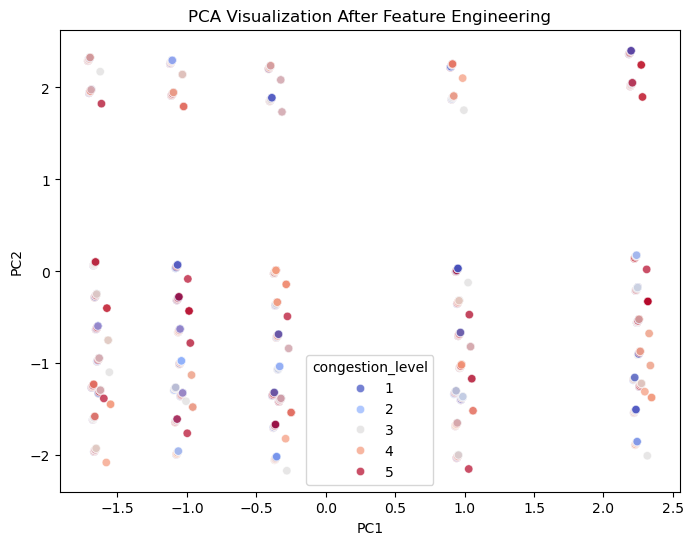

In [53]:
#4. Apply PCA with Enough Components
# Run PCA with 2 components (since now we have multiple features)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca['congestion_level'] = df['congestion_level'].values

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="congestion_level", palette="coolwarm", data=df_pca, alpha=0.7)
plt.title("PCA Visualization After Feature Engineering")
plt.show()

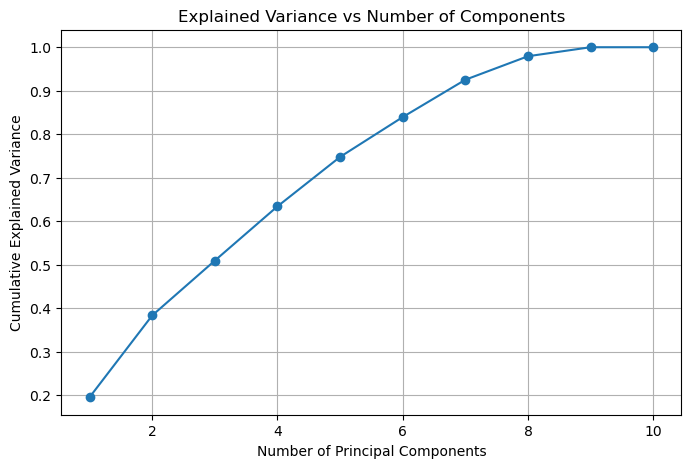

In [54]:
#5. Explained Variance Plot (Optional)
# Explained variance ratio
pca_full = PCA().fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.show()

**Insights**:  
- This plot shows how many components explain most of the variance.  

## 5. Build and Deploy a Machine Learning Model

#Choose a suitable model (e.g., Logistic Regression, Decision Tree, Random Forest, etc.)
based on your problem.

In [57]:
#1. Logistic Regression (Multinomial)

#Baseline model.

#Simple, interpretable.

#Works well if the relationship between features and target is mostly linear.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [58]:
#2. Decision Tree

#Captures non-linear relationships.

#Easy to interpret with rules.

#Can overfit small datasets.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [59]:
#3. Random Forest (Recommended)

#Ensemble of Decision Trees → more robust and accurate.
#Handles non-linearities and categorical features well (after encoding).
#Good balance between performance and interpretability.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

Since my target is traffic congestion level (multi-class classification):

I Started with Logistic Regression as a baseline.

Then tried Random Forest for stronger predictive performance.

Train and evaluate your model using accuracy, precision, recall, F1-score, or other
appropriate metrics

Since my target is categorical congestion level, this is a multi-class classification problem.

We’ll:

Split the dataset into train/test

Train Logistic Regression (baseline) and Random Forest (stronger)

Evaluate with Accuracy, Precision, Recall, F1-score, Confusion Matrix

Model Training and Evaluation

We apply classification models (Logistic Regression & Random Forest)  
to predict traffic congestion levels.  
Evaluation metrics: Accuracy, Precision, Recall, F1-score, Confusion Matrix.

In [60]:
#1. Split Data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns=['congestion_level','date','time'], errors='ignore')
y = df_encoded['congestion_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (1579, 10) Test shape: (395, 10)


In [61]:
#2. Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(max_depth=10, random_state=42)

🔹 Logistic Regression Evaluation
Accuracy: 0.2430379746835443


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (macro): 0.1415788382213493
Recall (macro): 0.20173903506680527
F1 Score (macro): 0.16181155592799032

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        59
           2       0.00      0.00      0.00        53
           3       0.21      0.23      0.22        94
           4       0.24      0.23      0.23        92
           5       0.27      0.55      0.36        97

    accuracy                           0.24       395
   macro avg       0.14      0.20      0.16       395
weighted avg       0.17      0.24      0.19       395



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


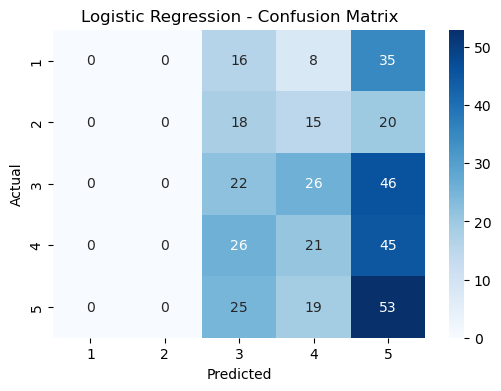

🔹 Random Forest Evaluation
Accuracy: 0.23544303797468355
Precision (macro): 0.2411964699798142
Recall (macro): 0.23378807882533273
F1 Score (macro): 0.23629414884075262

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.25      0.26        59
           2       0.28      0.21      0.24        53
           3       0.20      0.22      0.21        94
           4       0.20      0.18      0.19        92
           5       0.28      0.30      0.29        97

    accuracy                           0.24       395
   macro avg       0.24      0.23      0.24       395
weighted avg       0.24      0.24      0.24       395



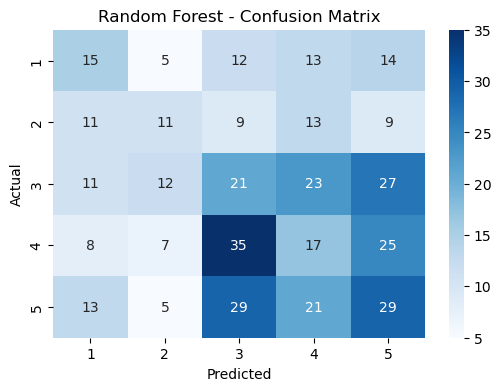

In [62]:
#3. Evaluate Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"🔹 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(rf, X_test, y_test, "Random Forest")

Interpretation

Accuracy → overall correctness of predictions.

Precision → when the model predicts a congestion level, how often it’s right.

Recall → how well the model finds all instances of each class.

F1-score → balance of precision & recall.

Confusion Matrix → shows misclassifications between congestion levels.

In [77]:
# Save Trained Model for Deployment
#We now save the trained model and feature columns to disk, 
#so Streamlit can load and use them for predictions.
#1. Train Final Model 

from sklearn.ensemble import RandomForestClassifier
import joblib

# Train final model on full dataset
X = df_encoded.drop(columns=['congestion_level','date','time'], errors='ignore')
y = df_encoded['congestion_level']

rf_final = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42)
rf_final.fit(X, y)

# Save model
joblib.dump(rf_final, "traffic_model.pkl")

# Save feature columns
joblib.dump(list(X.columns), "feature_columns.pkl")

print("✅ Model and feature columns saved successfully!")

✅ Model and feature columns saved successfully!


In [74]:
#2. Verify Files Were Created
import os
print(os.listdir())

['.ipynb_checkpoints', 'app.py.txt', 'archive.zip', 'feature_columns.pkl', 'RUTANGA(predicting traffic congestion).ipynb', 'traffic_model.pkl']


In [75]:
#3. Use in Streamlit

model = joblib.load("traffic_model.pkl")
feature_cols = joblib.load("feature_columns.pkl")

In [76]:
# you Don't run this in Python code/Jupyter notebook
# Instead, open your terminal/command prompt and type:
# streamlit run app.py

# If you need to run this from within Python code, use the subprocess module:
import subprocess
subprocess.run(["streamlit", "run", "app.py"], shell=True)

CompletedProcess(args=['streamlit', 'run', 'app.py'], returncode=2)